# Introduction 


As a Data Scientist, you will often be asked to cluster data. Clustering is a method of unsupervised learning, which means that you are not given a target variable to predict. Instead, you are given a set of data points and asked to group them into clusters. Clustering is a great way to explore your data and find hidden patterns. 


In this notebook, you will learn how to cluster data using the K-Means algorithm. You will also learn how to choose the optimal number of clusters for your data.

# What is K-Means Clustering?


K-Means clustering is an unsupervised learning algorithm that groups data into non-overlaping clusters. The algorithm works by randomly assigning each data point to a cluster. Then, it calculates the centroid of each cluster. The centroid is the center point of a cluster. Next, the algorithm reassigns each data point to the cluster whose centroid is closest to the data point. The algorithm repeats these steps until the data points no longer change clusters.

Here we can see the K-Means algorithm in action. The data points are randomly assigned to clusters. Then, the centroids are calculated. Next, the data points are reassigned to clusters. Finally, the centroids are recalculated. The algorithm repeats these steps until the data points no longer change clusters.             

(Cleick on image for an interesting article)

![K-Means Clustering](https://static.javatpoint.com/tutorial/machine-learning/images/k-means-clustering-algorithm-in-machine-learning.png)

As you can see the data was grouped into 3 clusters. The algorithm was able to find the 3 clusters in the data without being told that there were 3 clusters. This is the power of unsupervised learning.


**Now let's start coding!**

In [1]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Let's make some data, we're gonna use ```make_blobs``` from ```sklearn.datasets```. This  creates data in a way we can manipulate to create clusters.


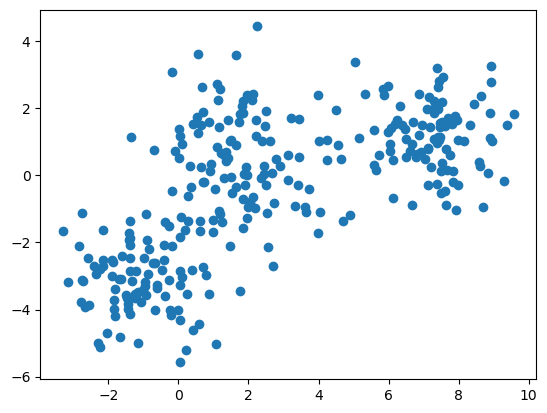

In [2]:
from sklearn.datasets import make_blobs

# creating data

data = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=1.1, random_state=53)
plt.scatter(data[0][:,0], data[0][:,1])

Now after we created the data let's start modeling. 


for modeling we will do it in 2 ways, first we will build our own K-Means algorithm and then we will use the K-Means algorithm from ```sklearn.cluster```

if you only want to use the K-Means algorithm from ```sklearn.cluster``` you can skip to the next section.

# Building our own K-Means algorithm


So just as we saw in the ```What's the K-mean``` section, we will create a class ```Kmean_Model``` that will have 5 parametrers ```k```, ```max_iter```, ```dist_type```, ```centroids```,```clusters```. 

```k``` is the number of clusters we want to create, ```max_iter``` is the maximum number of iterations we want to run the algorithm, ```dist_type``` is the distance type we want to use to calculate the distance between the data points and the centroids, ```centroids``` is the centroids of the clusters, ```clusters``` is the clusters we created.


The class will also have 2 methods ```fit``` and ```predict```. 

```fit``` is the method that will run the K-Means algorithm, it will take 2 parameters ```X``` and ```y```, ```X``` is the data we want to cluster and ```y``` is the target variable, we will not use it in this case.

```predict``` is the method that will predict the cluster of a new data point, it will take 1 parameter ```X``` which is the data we want to predict.

In [3]:
class Kmean_Model :
    
    # parameters
    
    k = 3
    max_iter = 300
    dist_type = 'Ecludian'
    centroids = {}
    clusters = {}
    
    # constructor
    
    def __init__(self, k, max_iter, dist_type):
        self.k = k
        self.max_iter = max_iter
        self.dist_type = dist_type
        
    # fit method
    
    def fit(self, data):
        
        # initializing centroids randomlly 
        
        for i in range(self.k):
            self.centroids[i] = np.random.uniform((np.min(data)+np.mean(data))/2, (np.max(data)+ np.mean(data))/2, data.shape[1])      ## this will allow us to make accurate clusters by the end
            
        
       
        # running algorithm
        
        for i in range(self.max_iter):
            
            # initializing clusters
            
            for i in range(self.k):
                self.clusters[i] = []
                
            # assigning data points to clusters
            
            for featureset in data:
                
                if self.dist_type == 'Ecludian':
                    distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
                elif self.dist_type == 'Manhattan':                                                                      #the Manhattan distance is better when dealing with high dimensional data
                    distances = [np.sum(np.abs(featureset - self.centroids[centroid])) for centroid in self.centroids]
                
              
                cluster = distances.index(min(distances))
                self.clusters[cluster].append(featureset)

                
            # updating centroids
            
            prev_centroids = dict(self.centroids)
            
            for cluster in self.clusters:
                self.centroids[cluster] = np.average(self.clusters[cluster], axis=0)
                
            # checking convergence , this part will stop the algorithm if the centroids are not changing much
            
            optimized = True
            
            for centroid in self.centroids:
                original_centroid = prev_centroids[centroid]
                current_centroid = self.centroids[centroid]
                if np.sum((current_centroid - original_centroid)/original_centroid * 100.0) > 0.001:
                    optimized = False
                    
            if optimized:
                break
            
    # predict method
    
    def predict(self, data):
        
        # assigning data points to clusters
        
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        cluster = distances.index(min(distances))
        return cluster
    
        

**Great for now, let's plot the results**

Note : we used a predict model just to make it easier when we plot new data labels but it's not necessary to make one, cause it's more of a classification class than a clustering

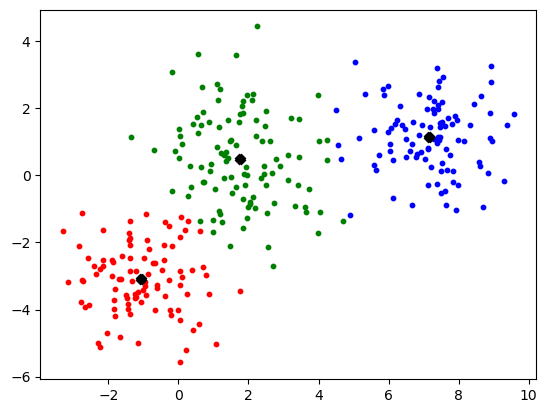

In [4]:
kmeans = Kmean_Model(3, 1000, 'Ecludian')
kmeans.fit(data[0])
kmeans.predict(data[0])

# plotting the clusters

colors = ['r', 'g', 'b']

for cluster in kmeans.clusters:
    
    for featureset in kmeans.clusters[cluster]:
        
        plt.scatter(featureset[0], featureset[1], color=colors[cluster], marker='o',s=10)
        
for centroid in kmeans.centroids:
  
    plt.scatter(kmeans.centroids[centroid][0], kmeans.centroids[centroid][1], color='k', marker='x', s=25, linewidths=5)
            
    

As we can see the algorithm was able to find the 3 clusters in the data without being told that there were 3 clusters. This is the power of unsupervised learning.


**Now let's try it on new data just for fun**

In [5]:
kmeans.predict(np.array([[1,1], [2,2], [3,3], [4,4], [5,5]]))
                                 

1

The output shows the cluster each point belongs to.

Now let's use the pre-built K-Means algorithm from ```sklearn.cluster```

# Using the K-Means from sickit-learn


Now let's use the pre-built K-Means algorithm from ```sklearn.cluster```, we will use the same data we used before.

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(data[0]) 


KMeans(n_clusters=3)

Now plotting the results

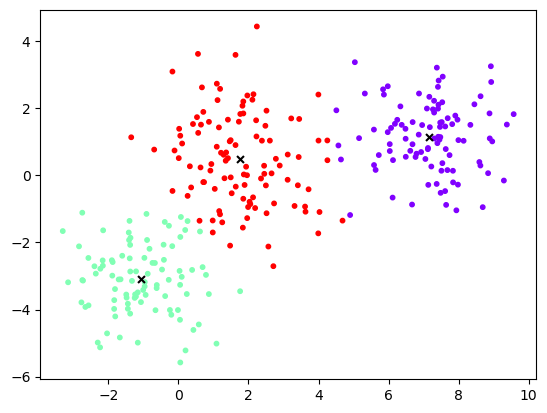

In [7]:
plt.scatter(data[0][:,0], data[0][:,1], c=kmeans.labels_, s=10 , cmap='rainbow' )
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black',s=25, marker='x')

The results are the same as the ones we got from our own K-Means algorithm. this confirms that our algorithm is working correctly.

# Last 


Clustering is a powerfull tool if you know how to use it, this wan a small introduction but if you want to proceed further in it world consider reading about this topics :

- Normalization/Standardization : because clustreing is a algorithm based on calculating distences
- Overlaping Clusters
- PCA

### If you liked the notebook don't forget to upvot, Thank You